In [3]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math
import random

# Part 1

In [17]:
# Function with many minima
def yfunc(x):
    return x**2 + np.sin(8*x)
xbase = np.linspace(-2, 2, 100)
ybase = yfunc(xbase)

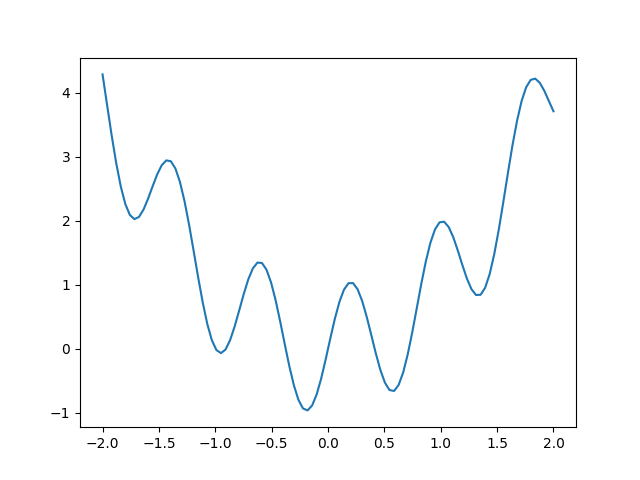

In [18]:
T=3
decayrate=0.95
bestcost=10000
bestx=-2

rangemin, rangemax = -2, 2 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

def f1(f,T,decayrate,bestx,bestcost):
        dx = (np.random.random_sample() - 0.5) * T
        x = bestx + dx
        # print(f"Old x = {x}, delta = {dx}")
        y = f(x)
        if y < bestcost:
            # print(f"Improved from {bestcost} at {bestx} to {y} at {x}")
            bestcost = y
            bestx = x
        else:
            toss = np.random.random_sample()
            if toss < np.exp(-(y-bestcost)/T):
                bestcost = y
                bestx = x
            # print(f"New cost {y} worse than best so far: {bestcost}")
        T = T * decayrate
        return bestx,bestcost,T,x,y
def onestep(frame):
    global T,bestx,bestcost
    bestx,bestcost,T,x,y=f1(yfunc,T,decayrate,bestx,bestcost)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    lngood.set_data(bestx, bestcost)
    
ani= FuncAnimation(fig, onestep, frames=range(100), interval=100, repeat=False)
plt.show()

For part 1, I created a function that takes as inputs the function to be minimised, T, decayrate, bestx, bestcost and returns bestx, bestcost, T, x, y. And in onestep function I declared T, bestx,bestcost as global variables so that they can be changed in function f1. I updated the values of T, bestx, bestcost for every frame and plotted them. 

# Part 2

## Reading the inputs

In [4]:
filename="tsp_100.txt"
f=open(filename,"r")
p=f.readlines()
l=len(p)-1
c=[]
x=[]
y=[]
z=0
for line in p:
    if z==0:
        z=z+1
        continue
    p=line.split()
    d1=[]
    x.append(float(p[0]))
    y.append(float(p[1]))
    d1.append(float(p[0]))
    d1.append(float(p[1]))
    c.append(d1)

coords=np.array(c)
x=np.array(x)
y=np.array(y)


## Solving

In [5]:

def tsp(coords, T, dr, ST,N):
    def path_dist(coords, path):
        distance = 0
        for i in range(len(path)-1):
            distance += math.dist(coords[path[i]], coords[path[i+1]])
        distance += math.dist(coords[path[-1]], coords[path[0]])
        return distance
    
    def AP(cost, new_cost, temp):
        if new_cost < cost:
            return 1.0
        else:
            return math.exp((cost - new_cost) / temp)
    
    n = coords.shape[0]
    # Create a random initial path
    path = np.arange(n)
    np.random.shuffle(path)
    # Initialize the current best path and its length
    best_path = path.copy()
    best_dist = path_dist(coords, path)
    # Initialize the current path and its length
    current_path = path.copy()
    current_dist = best_dist
    # Initialize the iteration counter
    i = 0
    # Main loop
    while T>=ST and i < N:
        # Generate a new path by swapping two cities
        new_path = current_path.copy()
        i1 = np.random.randint(0, n-1)
        i2 = np.random.randint(0, n-1)
        while i2 == i1:
            i2 = np.random.randint(0, n-1)
        new_path[i1], new_path[i2] = new_path[i2], new_path[i1]
        # Calculate the cost of the new path
        new_dist = path_dist(coords, new_path)
        # Decide whether to accept the new path
        ap = AP(current_dist, new_dist, T)
        if ap > random.random():
            current_path = new_path.copy()
            current_dist = new_dist
        # Update the current best path if necessary
        if current_dist < best_dist:
            best_path = current_path.copy()
            best_dist = current_dist
        # Decrease the temperature
        T =T * dr
        i=i + 1
    return best_path, best_dist


I created a function that takes in as inputs coordinates of the cities,T, decayrate, Stopping Temperature(so that it won't go below that temperature) and number of iterations.First I calculated the distance travelled for a random path then I interchanged positions of two random cities and checked for the distance.Iterated the above process for N times and it returns the bestpath and distance among those calculated.

In [11]:
T = 2
dr = 0.99
ST = 1e-128
N = 1000000
best_path, best_dist = tsp(coords, T, dr, ST, N)
print(f"Shortest path found: {best_path}")
print(f"Length of shortest path: {best_dist:.3f}")

Shortest path found: [64 77 35 58 75 82 46 98 62  1 81 44 32 33 23  8 26 67 69 83 66  9 11 37
 10 85 78  5 18 80 22  3 55 31 97 90 71 94 74 40 13 43 79 70 20 91 28 41
 17 88 34  0 95 50 39 52 65 27 14 93 15 42 12 57 38 63  6 76 16  4 89  2
 48 49 24 60 61 19 30 25 86 84 72 87 45 56 47 51 68 92 99  7 36 21 54 53
 59 29 96 73]
Length of shortest path: 130.170


# Plot

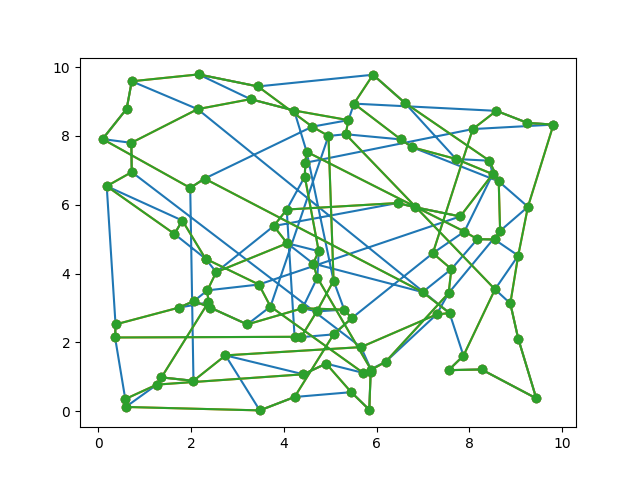

In [13]:
xplot = x[best_path] 
yplot = y[best_path]
xplot = np.append(xplot, xplot[0])
yplot = np.append(yplot, yplot[0])
plt.plot(xplot, yplot, 'o-')
plt.show()